In [1]:
import pandas as pd
import os

# Sales Analysis
___

### Merge data from 12 files/months
- data is from https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

In [2]:
files = [file for file in os.listdir('./Sales_Data/')]

all_data = pd.DataFrame()
for file in files :
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data = all_data.dropna().sort_values("Order Date", ascending=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


## Augment data with additional columns 
- Could use feature engineering :o

### Add a month column

In [3]:
# we can use string slicing, from order date
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data = all_data[all_data["Month"].str.isdigit() == True]  # must only have a number in month
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",1
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1


### Add a sales column
- revenue generated from one row of sales

In [4]:
# must make Quantity Ordered and Price Each a number/float
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32") # or use pd.to_numeric(Series)
all_data["Price Each"] = all_data["Price Each"].astype("float")

# then we multiply
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

# Note : in this dataset, each orderID has one certain product
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90


### BEST month of sales & How much revenue earned that Month
___

In [5]:
import calendar
# we group by the month column then find total revnue for each month

sales_per_month = all_data.groupby("Month").sum()["Sales"] # only looking at sales right now
sales_per_month = sales_per_month.to_dict()

# a loop to find best month of sales
max_year = None
max_sale = float("-inf")

for year, sale in sales_per_month.items():
    if sale > max_sale:
        max_sale = sale
        max_year = year

print(f"Month with the greatest sales is {calendar.month_name[max_year]}\nRevenue generated was ${max_sale}")

Month with the greatest sales is December
Revenue generated was $4613443.34


### Visualize results

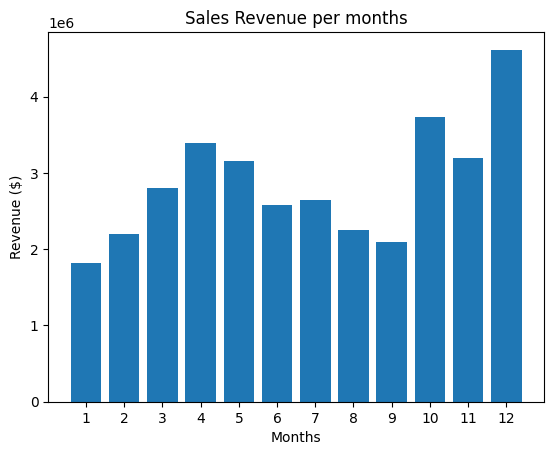

In [6]:
# use barchart for this data
import matplotlib.pyplot as plt

months = list(sales_per_month.keys())
revenue = sales_per_month.values()

plt.bar(months, revenue)

plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Revenue ($)")
plt.title("Sales Revenue per months")

plt.show()

##### Let's wonder why :o
- December is probably higher because of christmas so many people buy gifts

### Create City column

In [7]:
# we need to split the purchase address to get city

#all_data["City"] = all_data['Purchase Address'].str.split(',').str[1] + all_data['Purchase Address'].str.split(',').str[2]
# or

def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


## CITY with highest **number** of sales
___

In [8]:
number_sales_per_city = all_data.groupby("City").sum()["Quantity Ordered"]
number_sales_per_city = number_sales_per_city.to_dict()

# a loop to find best city for sales
max_city = None
max_number = float("-inf")

for city, number in number_sales_per_city.items():
    if number > max_number:
        max_number = number
        max_city = city

print(f"City with the greatest number of sales is {max_city}\nNumber of sales was {max_number}")

City with the greatest number of sales is  San Francisco (CA)
Number of sales was 50239


### Visualize results

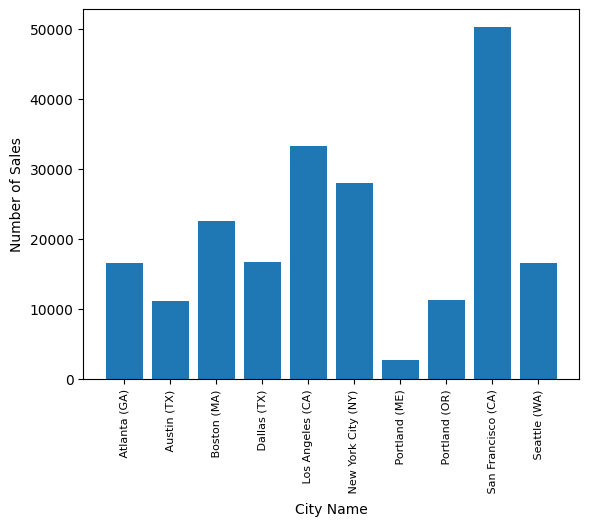

In [9]:
cities = list(number_sales_per_city.keys())
number_sales = number_sales_per_city.values()

plt.bar(cities, number_sales)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Number of Sales")
plt.xlabel("City Name")
plt.show()

### Hypothesis
- maybe people are richer in San Francisco
- maybe a lot of advertising
- maybe they need more electronincs

## Best time for advertisments ?
___

### Creating Hour and Minute columns

In [10]:
all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

C:\Users\Naren\AppData\Local\Temp\ipykernel_7220\464911629.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3,7
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3,40
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4,56
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5,53
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6,3


In [11]:
sales_by_hour = all_data.groupby('Hour')["Sales"].sum()  # getting sum of revnue per hour
sales_by_hour = sales_by_hour.to_dict()

# a loop to find best city for sales
max_hour = None
max_sale_hour = float("-inf")

for hour, sale_hour in sales_by_hour.items():
    if sale_hour > max_sale_hour:
        max_sale_hour = sale_hour
        max_hour = hour

print(f"Best hour for sales is {max_hour}\nRevenue from sales was ${max_sale_hour}")

Best hour for sales is 19
Revenue from sales was $2412938.54


### Visualize data

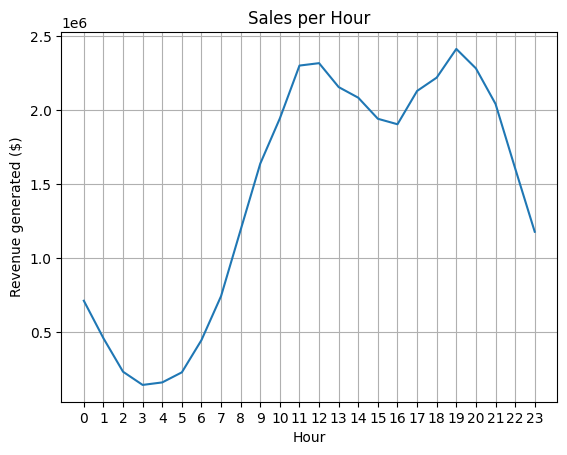

In [12]:
hours = list(sales_by_hour.keys())
revenues_per_hour = sales_by_hour.values()

plt.plot(hours, revenues_per_hour)
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Revenue generated ($)")
plt.title("Sales per Hour")
plt.show()

### Best specific time for sales

In [13]:
sales_by_time = all_data.groupby('Order Date')["Sales"].sum()  # getting sum of revnue per minute
sales_by_time = sales_by_time.to_dict()

# a loop to find best time for sales
max_time = None
max_sale_time = float("-inf")

for time, sale_time in sales_by_time.items():
    if sale_hour > max_sale_hour:
        max_sale_time = sale_time
        max_time = time

print(f"Best time for sales is {max_hour}\nRevenue from sales was ${max_sale_hour}")

Best time for sales is 19
Revenue from sales was $2412938.54


### Visualize Data

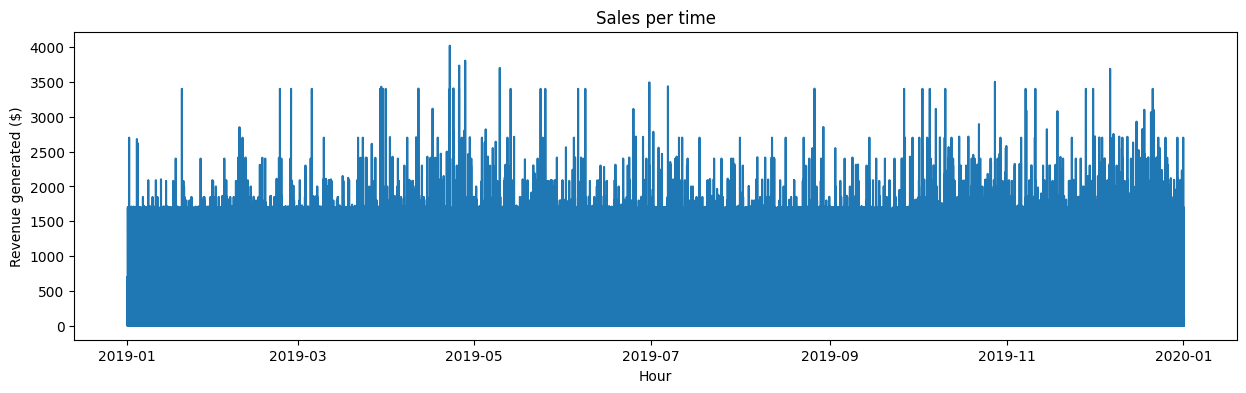

In [14]:
time = list(sales_by_time.keys())
revenues_per_time = sales_by_time.values()


plt.figure(figsize=(15,4))
plt.plot(time, revenues_per_time)
#plt.xticks(time[::2])  
plt.xlabel("Hour")
plt.ylabel("Revenue generated ($)")
plt.title("Sales per time")
plt.show()

#### Useless ?
- this was pretty useless because we cannot really do anything with information of specific time

## Products that are most often sold together

### Method 1 :

In [85]:
bought_together = all_data[all_data["Order ID"].duplicated(keep=False)] #only keep ones with duplicates
# keep = False -> if its not duplicated, do not keep it
bought_together.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3764,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City (NY),7,29
3763,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City (NY),7,29
7190,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta (GA),11,25
7189,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta (GA),11,25
7577,148450,Lightning Charging Cable,1,14.95,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,14.95,Dallas (TX),12,2


In [86]:
bought_together["Grouped"] = bought_together.groupby('Order ID')['Product'].transform(
    lambda x : ','.join(x)
) # make a new column by joining order ID and Product id , x is a list

bought_together = bought_together[['Order ID', 'Grouped']].drop_duplicates()
bought_together.head()

C:\Users\Naren\AppData\Local\Temp\ipykernel_7220\2644473962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bought_together["Grouped"] = bought_together.groupby('Order ID')['Product'].transform(


,Order ID,Grouped
3764,144804,"Wired Headphones,iPhone"
7190,148074,"USB-C Charging Cable,Google Phone"
7577,148450,"Lightning Charging Cable,iPhone"
3629,144679,"Google Phone,USB-C Charging Cable"
6537,147451,"Google Phone,Wired Headphones"


In [158]:
# we now have a dataframe with orderID and what each orderID bought (products > 1)
# Referenced : https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in bought_together["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

top_common = dict(count.most_common(10))

#top_common

bought = dict(count)

#### Visualize data

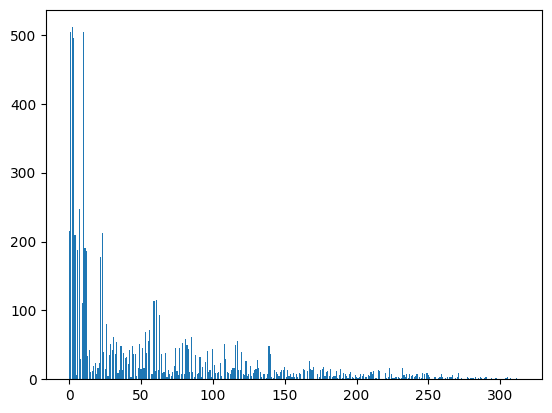

In [159]:
product_together = list(bought.keys())
number_of_products = list(bought.values())
product_together = range(len(number_of_products))

plt.bar(product_together, number_of_products)
plt.show()

In [160]:
top_common = {str(" x ".join(key)):item for key, item in top_common.items()}
top_common

{'Lightning Charging Cable x iPhone': 511,
 'USB-C Charging Cable x Google Phone': 504,
 'iPhone x Lightning Charging Cable': 504,
 'Google Phone x USB-C Charging Cable': 495,
 'iPhone x Wired Headphones': 247,
 'Wired Headphones x iPhone': 215,
 'Wired Headphones x Google Phone': 213,
 'Google Phone x Wired Headphones': 210,
 'USB-C Charging Cable x Vareebadd Phone': 190,
 'iPhone x Apple Airpods Headphones': 187}

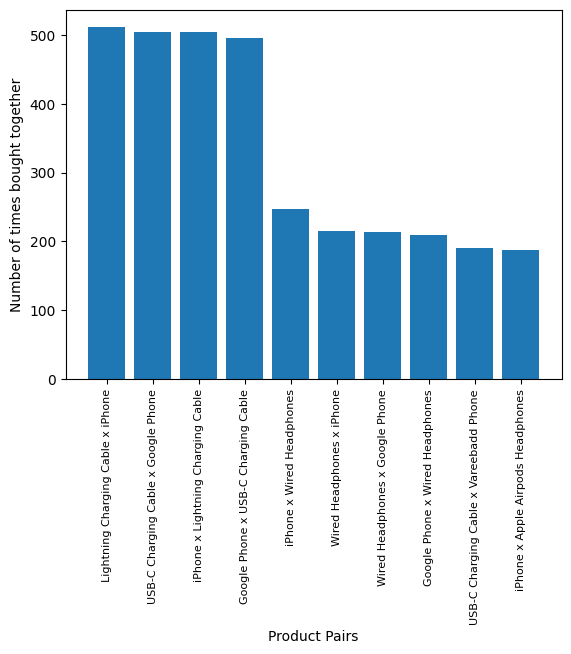

In [161]:
paired_products = list(top_common.keys())
number_times_bought = list(top_common.values())

plt.bar(paired_products, number_times_bought)
plt.xticks(paired_products, rotation="vertical", fontsize=8)
plt.xlabel("Product Pairs")
plt.ylabel("Number of times bought together")
plt.show()

___
### Method 2 :

In [166]:
products = all_data.groupby('Order ID')['Product'].agg(list).reset_index()
products = products.set_index('Order ID')['Product'].to_dict()
products = {key:item for key,item in products.items() if len(item)>1}

AttributeError: 'dict' object has no attribute 'head'

In [175]:
#same as before to count number of times a combination appeared
from itertools import combinations
from collections import Counter

count = Counter()

for products_list in list(products.values()) :
    count.update(Counter(combinations(products_list, 2)))

top_common2 = dict(count.most_common(10))
bought2 = dict(count)

### Visualize data

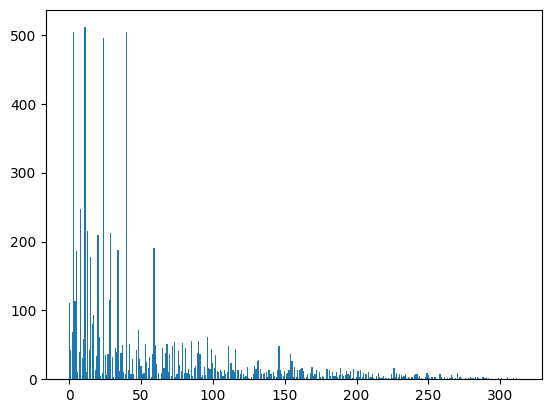

In [178]:
product_together2 = list(bought2.keys())
number_of_products2 = list(bought2.values())
product_together2 = range(len(number_of_products2))

plt.bar(product_together2, number_of_products2)
plt.show()

In [177]:
top_common2 = {str(" x ".join(key)):item for key, item in top_common2.items()}
top_common2

{'Lightning Charging Cable x iPhone': 511,
 'USB-C Charging Cable x Google Phone': 504,
 'iPhone x Lightning Charging Cable': 504,
 'Google Phone x USB-C Charging Cable': 495,
 'iPhone x Wired Headphones': 247,
 'Wired Headphones x iPhone': 215,
 'Wired Headphones x Google Phone': 213,
 'Google Phone x Wired Headphones': 210,
 'USB-C Charging Cable x Vareebadd Phone': 190,
 'iPhone x Apple Airpods Headphones': 187}

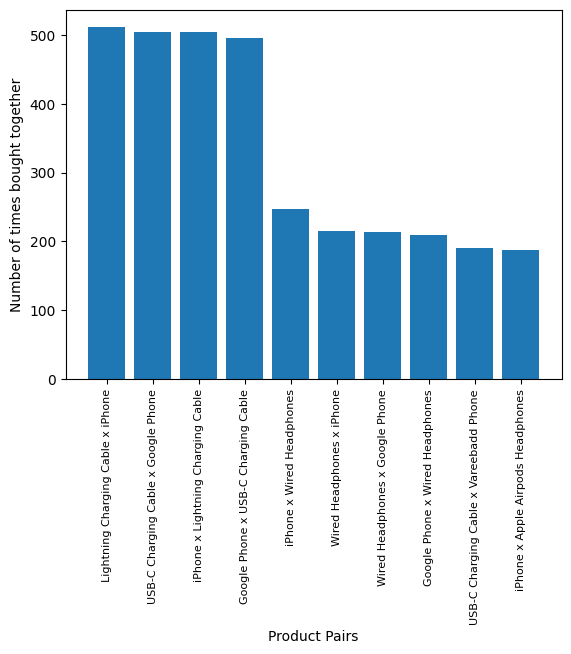

In [179]:
paired_products2 = list(top_common2.keys())
number_times_bought2 = list(top_common2.values())

plt.bar(paired_products2, number_times_bought2)
plt.xticks(paired_products2, rotation="vertical", fontsize=8)
plt.xlabel("Product Pairs")
plt.ylabel("Number of times bought together")
plt.show()

## What product sold the most

In [182]:
product_quantity = all_data.groupby("Product")["Quantity Ordered"].sum()
product_quantity = product_quantity.to_dict()

# a loop to find most sold product
max_product = None
max_quantity = float("-inf")

for product, quantity in product_quantity.items():
    if quantity > max_quantity:
        max_quantity = quantity
        max_product = product

print(f"Most sold product is the {max_product}\nQuantity sold was {max_quantity}")

Most sold product is the AAA Batteries (4-pack)
Quantity sold was 31017


### Visualize data

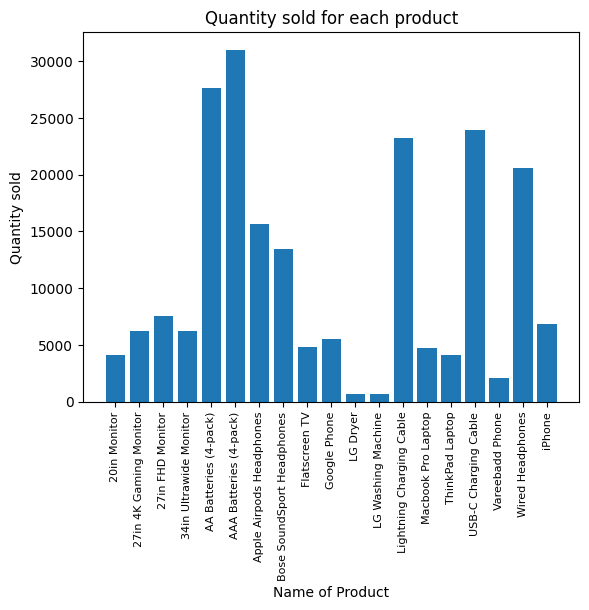

In [184]:
product_names = list(product_quantity.keys())
quantity_sold = list(product_quantity.values())

plt.bar(product_names, quantity_sold)
plt.xticks(product_names, rotation='vertical', fontsize=8)
plt.xlabel("Name of Product")
plt.ylabel("Quantity sold")
plt.title("Quantity sold for each product")
plt.show()

### Overlaying the graphs with mean price

C:\Users\Naren\AppData\Local\Temp\ipykernel_7220\1283601609.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_names, rotation='vertical', fontsize=8)


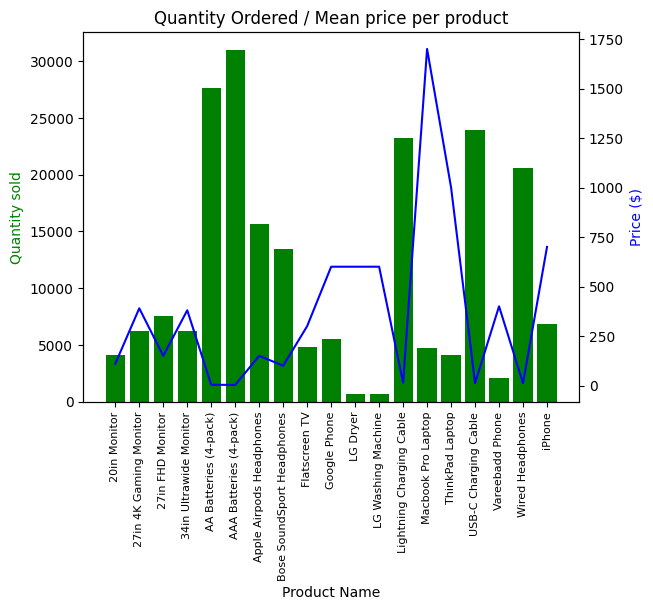

In [191]:
prices = all_data.groupby('Product')["Price Each"].mean()
#prices = prices.to_dict()

fig, ax1 = plt.subplots()

ax1.bar(product_names, quantity_sold, color='g')
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity sold", color='g')
ax1.set_xticklabels(product_names, rotation='vertical', fontsize=8)

ax2 = ax1.twinx()
ax2.plot(product_names, prices, 'b-')
ax2.set_ylabel("Price ($)", color='b')

plt.title("Quantity Ordered / Mean price per product")

plt.show()